### HENDRO PRATAMA SARAGIH - 1301164683
### RIZKI ACHMAD RIYANTO - 1301160509

#Masukin Dataset

In [1]:
import pandas as pd
datatrain = pd.read_csv('train.csv') 
datatrain.head()

,ALogP,ATS0m,AATS6m,AATS8v,AATS8e,AATS1i,AATS3i,AATS2s,AATS7s,AATS8s,...,nHBDon,MIC2,ZMIC5,MDEC-33,MLFER_E,n6Ring,nHeteroRing,n6HeteroRing,SRW5,Label
0,-0.9195,2588.934432,48.158117,178.551366,7.519247,149.013676,161.485521,3.284722,3.060185,2.833333,...,2,30.767343,24.812853,1.310371,1.985,2.0,1.0,1.0,0.000000,0
1,0.4614,5634.103006,94.201531,196.140696,7.581138,146.305448,158.591102,2.332989,1.925086,2.089559,...,2,39.741788,28.585041,3.383162,2.060,1.0,2.0,0.0,3.044522,1
2,0.5112,2834.386834,42.637339,168.834145,7.509380,140.140072,148.667669,3.262452,3.059524,3.482759,...,1,32.621372,22.616729,8.250206,1.857,2.0,0.0,0.0,2.397895,0
3,-1.4450,5379.145233,39.184295,172.733317,7.712846,150.265098,164.092245,2.858286,2.398794,2.870885,...,2,37.626171,29.787688,6.467895,3.576,3.0,3.0,2.0,2.397895,1
4,-2.5272,4699.962622,65.748944,205.559532,7.809137,151.119831,157.628443,4.743490,3.223584,3.759916,...,4,39.955030,30.249632,3.706843,3.322,2.0,1.0,0.0,2.397895,1


In [2]:
datatrain.info()
# datatrain.corr()
# datatrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 35 columns):
ALogP           1626 non-null float64
ATS0m           1626 non-null float64
AATS6m          1626 non-null float64
AATS8v          1626 non-null float64
AATS8e          1626 non-null float64
AATS1i          1626 non-null float64
AATS3i          1626 non-null float64
AATS2s          1626 non-null float64
AATS7s          1626 non-null float64
AATS8s          1626 non-null float64
ATSC1m          1626 non-null float64
ATSC1i          1626 non-null float64
ATSC3i          1626 non-null float64
ATSC8i          1626 non-null float64
AATSC0v         1626 non-null float64
C1SP2           1626 non-null int64
CrippenLogP     1626 non-null float64
SaasC           1626 non-null float64
SssNH           1626 non-null float64
SdO             1626 non-null float64
minHBa          1626 non-null float64
maxaaN          1626 non-null float64
MAXDN           1626 non-null float64
MAXDP           1626 

#Pisahin Fitur dan Kelas

In [3]:
from sklearn.preprocessing import StandardScaler

xtrainfull = datatrain.loc[:, datatrain.columns != 'Label']
xtrainfull = pd.DataFrame(StandardScaler().fit_transform(xtrainfull),columns = xtrainfull.columns)
ytrainfull = datatrain['Label']
xtrainfull.head()

,ALogP,ATS0m,AATS6m,AATS8v,AATS8e,AATS1i,AATS3i,AATS2s,AATS7s,AATS8s,...,ETA_dBeta,nHBDon,MIC2,ZMIC5,MDEC-33,MLFER_E,n6Ring,nHeteroRing,n6HeteroRing,SRW5
0,-0.330120,-0.974414,-0.481876,0.624452,0.006289,0.462182,0.760278,-0.061137,0.012035,-0.066678,...,0.627582,0.216825,-1.204699,-0.550318,-1.261550,-0.413263,-0.204846,-0.494401,0.182773,-1.258053
1,0.883516,0.292300,1.150521,1.006401,0.062246,-0.353966,0.117791,-1.056510,-0.917906,-0.650589,...,-0.958765,0.216825,0.128907,0.319815,-0.771164,-0.338403,-1.187380,0.299179,-0.845560,0.996695
2,0.927284,-0.872312,-0.677606,0.413444,-0.002631,-2.211957,-2.084955,-0.084428,0.011493,0.443164,...,0.810622,-0.647285,-0.929189,-1.056899,0.380293,-0.541023,-0.204846,-1.287981,-0.845560,0.517808
3,-0.791967,0.186244,-0.800028,0.498114,0.181327,0.839309,1.338903,-0.507126,-0.529816,-0.037198,...,-0.836739,0.216825,-0.185475,0.597230,-0.041371,1.174764,0.777688,1.092758,1.211106,0.517808
4,-1.743084,-0.096279,0.141779,1.210929,0.268386,1.096891,-0.095894,1.464519,0.145901,0.660750,...,1.542782,1.945044,0.160595,0.703787,-0.694587,0.921239,-0.204846,-0.494401,-0.845560,0.517808


#Ranking Fitur


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
# model.fit(xtrainfull,ytrainfull)
# importances = model.feature_importances_
# indices = np.argsort(importances)[::-1]

model = RandomForestClassifier()
# fit the model
model.fit(xtrainfull, ytrainfull)
# get importance
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(xtrainfull.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, xtrainfull.columns[indices[f]], importance[indices[f]]))

Feature ranking:
1. feature maxaaN (0.149113)
2. feature MIC2 (0.090702)
3. feature MLFER_E (0.088872)
4. feature ATS0m (0.082301)
5. feature SssNH (0.081500)
6. feature AATS8v (0.049065)
7. feature MDEC-33 (0.048340)
8. feature C1SP2 (0.047576)
9. feature AATS8s (0.040020)
10. feature AATS1i (0.038015)
11. feature nHeteroRing (0.035600)
12. feature SRW5 (0.028271)
13. feature n6Ring (0.028200)
14. feature nHBDon (0.027247)
15. feature AATS6m (0.025123)
16. feature ZMIC5 (0.014539)
17. feature ETA_dBeta (0.011392)
18. feature minHBa (0.010645)
19. feature SaasC (0.008937)
20. feature AATS7s (0.008639)
21. feature AATS3i (0.008576)
22. feature n6HeteroRing (0.008112)
23. feature CrippenLogP (0.007753)
24. feature ATSC1i (0.006978)
25. feature AATSC0v (0.006839)
26. feature MAXDP (0.006462)
27. feature MAXDN (0.006330)
28. feature SdO (0.006203)
29. feature ATSC3i (0.005996)
30. feature AATS8e (0.005862)
31. feature ATSC8i (0.005166)
32. feature ATSC1m (0.004899)
33. feature AATS2s (0.00

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#Pilih Fitur Paling Bagus

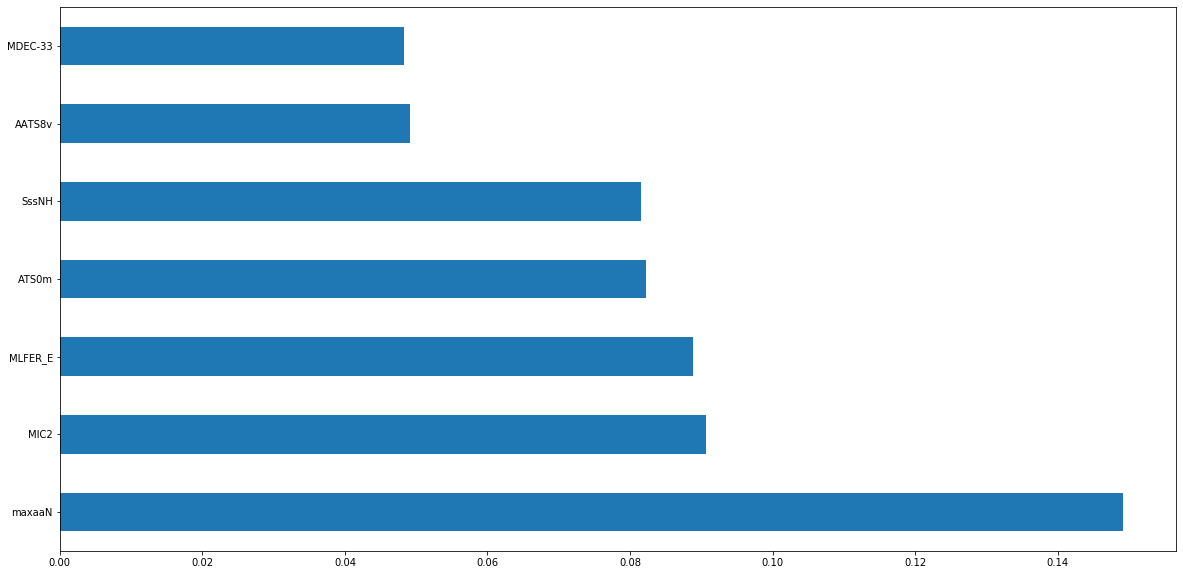

In [5]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xtrainfull.columns).nlargest(7)
plt.figure(figsize=(20,10))
feat_importances.plot(kind='barh')
plt.show()

#Coba Prediksi

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

xtrain_selected = xtrainfull[feat_importances.index]
X_train, X_test, y_train, y_test = train_test_split(xtrain_selected, ytrainfull, test_size=0.3, random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Gaussian Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy Gaussian Naive Bayes: 0.9508196721311475


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

xtrain_selected = xtrainfull[feat_importances.index]
X_train, X_test, y_train, y_test = train_test_split(xtrain_selected, ytrainfull, test_size=0.3, random_state=0)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Bernoulli Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy Bernoulli Naive Bayes: 0.9344262295081968


#Coba Prediksi Data Test

In [8]:
datatest = pd.read_csv('test.csv') 
datatest.head()

,ALogP,ATS0m,AATS6m,AATS8v,AATS8e,AATS1i,AATS3i,AATS2s,AATS7s,AATS8s,...,nHBDon,MIC2,ZMIC5,MDEC-33,MLFER_E,n6Ring,nHeteroRing,n6HeteroRing,SRW5,Label
0,0.6629,3600.454537,44.378864,90.232187,7.056266,143.816368,149.961105,2.213838,1.583039,1.456019,...,1,37.802054,21.851175,10.879323,2.290,2.0,3.0,1.0,3.044522,0
1,-0.7616,3060.383420,34.874461,115.931991,7.295112,145.030976,154.041649,2.221871,2.351732,2.798780,...,1,35.482547,20.365592,9.646462,1.873,3.0,2.0,1.0,2.397895,0
2,0.5121,7331.436096,85.318863,213.989917,7.858608,149.499565,156.948782,2.744017,2.548596,2.556183,...,3,50.066343,28.691766,7.450309,3.679,2.0,2.0,0.0,3.044522,1
3,0.2529,4204.710985,82.695080,203.246422,7.869357,152.792389,160.368528,4.551913,3.432323,4.172222,...,1,41.726760,30.059483,4.433632,3.659,3.0,3.0,2.0,2.397895,1
4,-0.2762,5244.652878,82.312760,136.455622,7.899088,146.426895,159.287076,3.833240,4.070850,3.122699,...,2,45.255873,26.226152,11.051717,2.533,2.0,1.0,0.0,0.000000,0


In [9]:
xtest = datatest.loc[:, datatest.columns != 'Label']
xtest = pd.DataFrame(StandardScaler().fit_transform(xtest),columns = xtest.columns)
ytest = datatest['Label']
xtest.head()

,ALogP,ATS0m,AATS6m,AATS8v,AATS8e,AATS1i,AATS3i,AATS2s,AATS7s,AATS8s,...,ETA_dBeta,nHBDon,MIC2,ZMIC5,MDEC-33,MLFER_E,n6Ring,nHeteroRing,n6HeteroRing,SRW5
0,1.048435,-0.560505,-0.704380,-1.239753,-0.348039,-1.045945,-1.704424,-1.174094,-1.099865,-1.078460,...,0.080059,-0.665103,-0.182396,-1.213436,1.032142,-0.137191,-0.191324,1.148616,0.227412,0.966818
1,-0.170002,-0.768723,-1.083063,-0.704569,-0.145900,-0.698275,-0.836473,-1.166006,-0.523321,-0.063401,...,-0.220593,-0.665103,-0.520435,-1.538778,0.737784,-0.547366,0.768050,0.339944,0.227412,0.495322
2,0.919449,0.877935,0.926789,1.337434,0.330994,0.580816,-0.218112,-0.640289,-0.375666,-0.246792,...,1.042145,1.061441,1.604973,0.284648,0.213430,1.229077,-0.191324,0.339944,-0.808577,0.966818
3,0.697744,-0.327540,0.822250,1.113707,0.340091,1.523356,0.509283,1.179974,0.287159,0.974851,...,1.823840,-0.665103,0.389582,0.584177,-0.506832,1.209404,0.768050,1.148616,1.263402,0.495322
4,0.245182,0.073398,0.807017,-0.277175,0.365253,-0.298707,0.279254,0.456385,0.766075,0.181465,...,0.140189,0.198169,0.903907,-0.255319,1.073303,0.101832,-0.191324,-0.468728,-0.808577,-1.253131


In [10]:
y_pred = gnb.predict(xtest[feat_importances.index])
# Model Accuracy, how often is the classifier correct?
print("Accuracy Gaussian Naive Bayes:",metrics.accuracy_score(ytest, y_pred))

Accuracy Gaussian Naive Bayes: 0.9483500717360115


In [11]:
y_pred = bnb.predict(xtest[feat_importances.index])
# Model Accuracy, how often is the classifier correct?
print("Accuracy Bernoulli Naive Bayes:",metrics.accuracy_score(ytest, y_pred))

Accuracy Bernoulli Naive Bayes: 0.9340028694404591
